In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [25]:
df = pd.read_csv('FSSPL.BO.csv')
df.dropna()
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-12,25.900000,25.900000,25.900000,25.900000,25.900000,64000.0
1,2018-02-14,31.049999,31.049999,31.049999,31.049999,31.049999,392000.0
2,2018-02-15,33.750000,34.150002,33.750000,34.150002,34.150002,680000.0
3,2018-02-16,37.400002,37.549999,32.099998,33.650002,33.650002,1656000.0
4,2018-02-19,37.000000,37.000000,30.750000,31.200001,31.200001,544000.0
5,2018-02-20,30.000000,31.000000,28.500000,30.500000,30.500000,448000.0


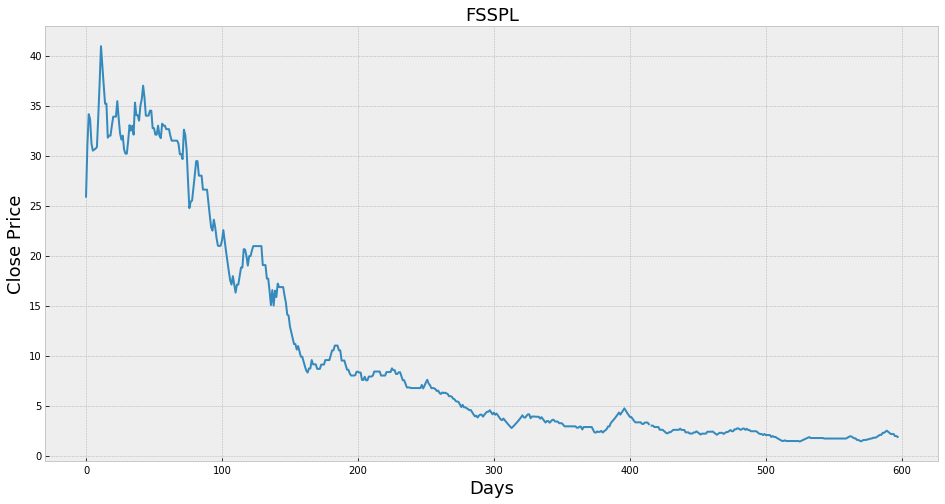

In [26]:
plt.figure(figsize=(16,8))
plt.title('FSSPL', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [27]:
df = df[['Close']]
df.head(4)

,Close
0,25.900000
1,31.049999
2,34.150002
3,33.650002


In [28]:
#Create a variable to predict 'x' days out into the future
future_days = 30
#Create a new column (the target or dependent variable) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
#print the data
df.tail(4)

,Close,Prediction
594,2.15,NaN
595,1.95,NaN
596,1.95,NaN
597,1.86,NaN


In [29]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[25.9     ]
 [31.049999]
 [34.150002]
 [33.650002]
 [31.200001]
 [30.5     ]
 [30.6     ]
 [30.700001]
 [30.85    ]
 [33.900002]
 [37.25    ]
 [40.950001]
 [38.950001]
 [37.049999]
 [35.200001]
 [35.200001]
 [31.799999]
 [32.      ]
 [32.      ]
 [33.      ]
 [33.900002]
 [33.900002]
 [33.900002]
 [35.450001]
 [33.75    ]
 [32.25    ]
 [31.6     ]
 [32.      ]
 [30.6     ]
 [30.200001]
 [30.200001]
 [31.5     ]
 [33.049999]
 [32.5     ]
 [33.      ]
 [32.099998]
 [35.299999]
 [34.049999]
 [34.049999]
 [33.5     ]
 [35.      ]
 [35.650002]
 [37.      ]
 [35.799999]
 [34.      ]
 [34.      ]
 [34.      ]
 [34.5     ]
 [34.5     ]
 [32.75    ]
 [32.75    ]
 [32.099998]
 [32.099998]
 [33.      ]
 [32.      ]
 [31.75    ]
 [33.200001]
 [33.      ]
 [33.      ]
 [32.650002]
 [32.650002]
 [32.650002]
 [32.      ]
 [31.5     ]
 [31.5     ]
 [31.5     ]
 [31.5     ]
 [31.5     ]
 [31.200001]
 [30.15    ]
 [30.15    ]
 [29.65    ]
 [32.599998]
 [32.049999]
 [30.549999]
 [27.5     ]
 [24.75    ]

In [30]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[30.200001 31.5      33.049999 32.5      33.       32.099998 35.299999
 34.049999 34.049999 33.5      35.       35.650002 37.       35.799999
 34.       34.       34.       34.5      34.5      32.75     32.75
 32.099998 32.099998 33.       32.       31.75     33.200001 33.
 33.       32.650002 32.650002 32.650002 32.       31.5      31.5
 31.5      31.5      31.5      31.200001 30.15     30.15     29.65
 32.599998 32.049999 30.549999 27.5      24.75     25.4      25.5
 26.75     28.049999 29.450001 29.450001 28.       28.       28.
 26.6      26.6      26.6      26.6      25.299999 24.049999 22.85
 22.5      23.6      22.85     21.75     21.       20.950001 21.
 21.5      22.549999 21.450001 20.4      19.4      18.450001 17.549999
 17.1      17.950001 17.1      16.299999 17.1      17.1      17.950001
 18.799999 18.799999 20.65     20.6      19.950001 19.       19.950001
 19.950001 20.5      20.950001 20.950001 20.950001 20.950001 20.950001
 20.950001 20.950001 19.049999 19.049999 19.04

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [32]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [33]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.75],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.7 ],
       [1.78],
       [1.86],
       [1.93],
       [1.9 ],
       [1.81],
       [1.72],
       [1.72],
       [1.56]])

In [34]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1.632 1.632 1.632 1.632 1.632 2.023 2.023 2.023 2.023 2.023 2.023 2.023
 2.023 2.023 2.023 2.023 2.023 2.023 2.023 2.023 2.023 2.023 2.115 1.75
 2.15  2.15  2.15  1.865 1.865 1.86 ]

[1.35379065 1.35379065 1.35379065 1.35379065 1.35379065 1.3115326
 1.3115326  1.3115326  1.3115326  1.3115326  1.3115326  1.3115326
 1.3115326  1.3115326  1.3115326  1.3115326  1.3115326  1.3115326
 1.3115326  1.3115326  1.3115326  1.3115326  1.37914548 1.44675837
 1.50591964 1.48056481 1.40450031 1.32843582 1.32843582 1.19321005]


/home/prathmesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


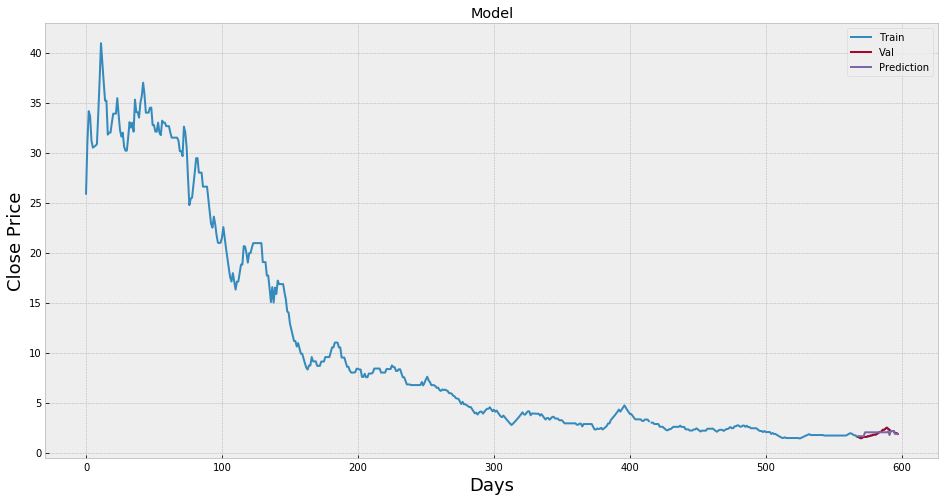

In [37]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper right')
plt.show()

/home/prathmesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


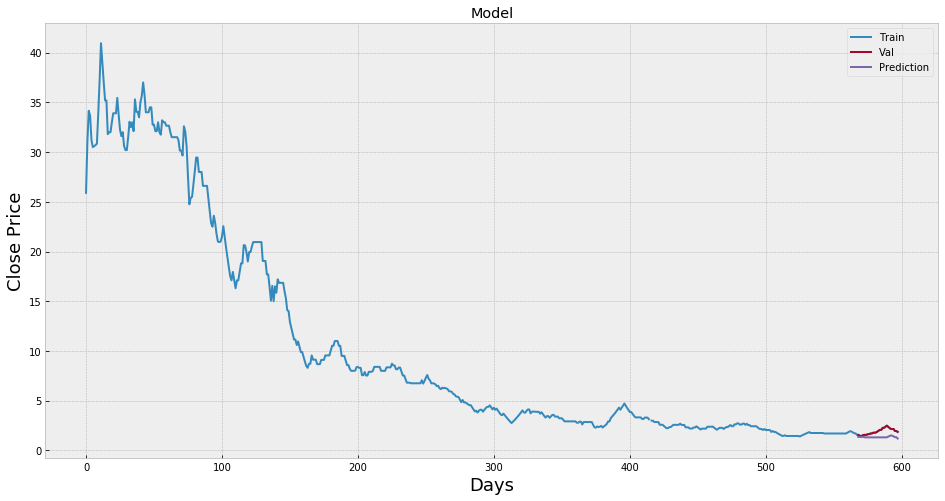

In [38]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='upper right')
plt.show()